<a href="https://colab.research.google.com/github/hoon0gim/NLPstudy/blob/main/NLPstudy02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
sentences = ['nice great best amazing', 'stop lies', 'pitful nerd', 'excellent word', 'supreme quality', 'bad', 'highly respectable']

In [4]:
y_train = [1, 0, 0, 1, 1, 0, 1]

In [5]:
t = Tokenizer()

In [7]:
t.fit_on_texts(sentences) # 텍>리)

In [8]:
vocab_size = len(t.word_index) +1

In [9]:
x_encoded = t.texts_to_sequences(sentences)
print(x_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [11]:
x_train = pad_sequences(x_encoded, maxlen = 4, padding = 'post')
y_train = np.array(y_train)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
#model = Sequential()
#model.add(Embedding(vocab_size, 2, input_length=max_len))
#model.add(Flatten())
#model.summary()

In [13]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import re
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter

In [14]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt") # train
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt") # test
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt") # train + test

('ratings.txt', <http.client.HTTPMessage at 0x7f76e0fd9610>)

In [3]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [8]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 61.2 MB/s 
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 22.43 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-05-24 04:48:21--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.

In [7]:
from konlpy.tag import Mecab
tokenizer = Mecab()

ModuleNotFoundError: ignored

In [6]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [7]:
def tokenize_and_remove_stopwords(data, stopwords, tokenizer):
    result = []

    for sentence in data:
        curr_data = []
        curr_data = tokenizer.morphs(sentence) # mecab 형태소 분석 tokenizer
        curr_data = [word for word in curr_data if not word in stopwords] # 불용어 제거
        result.append(curr_data)
    return result

In [8]:
def load_data(train_data, test_data, num_words=10000):

    # 중복 제거
    train_data.drop_duplicates(subset=['document'], inplace=True)
    test_data.drop_duplicates(subset=['document'], inplace=True)

    # Nan 결측치 제거
    train_data = train_data.dropna(how='any')
    test_data = test_data.dropna(how='any')

    # 토큰화 및 불용어 제거
    x_train = tokenize_and_remove_stopwords(train_data['document'], stopwords, tokenizer)
    x_test = tokenize_and_remove_stopwords(test_data['document'], stopwords, tokenizer)

    # 단어장 만드는 중...
    words = np.concatenate(x_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}

    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
    
    x_train = list(map(wordlist_to_indexlist, x_train))
    x_test = list(map(wordlist_to_indexlist, x_test))

    return x_train, np.array(list(train_data['label'])), x_test, np.array(list(test_data['label'])), word_to_index

In [9]:
x_train, y_train, x_test, y_test, word_to_index = load_data(train_data, test_data)

In [10]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수
# 단, 모든 문장은 <BOS>로 시작하는 것을 말합니다.

def get_encoded_sentence(sentence, word_to_index): ##### 텍스트 -> 숫자
    return [word_to_index['<BOS>']] + [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해주는 함수입니다.
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. ##### 숫자 -> 텍스트
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])

# 여러개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다.
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [11]:
# 데이터 셋 내 문장 길이 분포
total_data_text = list(x_train) + list(x_test)

# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

# 문장 길이의 평균값, 최대값, 표준편차를 계산
print('문장길이 평균 :', np.mean(num_tokens))
print('문장길이 최대 :', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를 들면 최대길이를 (평균 + 2*표준편차)로 한다면,
max_tokens = np.mean(num_tokens) +2 * np.std(num_tokens)

maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens)/len(num_tokens)))

문장길이 평균 : 15.96938143432699
문장길이 최대 : 116
문장길이 표준편차 :  12.843571939469296
pad_sequences maxlen :  41
전체 문장의 0.9342988343341575%가 maxlen 설정값 이내에 포함됩니다. 


In [12]:
# 패딩 추가
x_train = pad_sequences(x_train, value=word_to_index['<PAD>'], padding='pre', maxlen=maxlen)
x_test = pad_sequences(x_test, value=word_to_index['<PAD>'], padding='pre', maxlen=maxlen)

In [13]:
vocab_size = 10000
word_vector_dim = 200 # 2의 배수

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         2000000   
                                                                 
 lstm (LSTM)                 (None, 8)                 6688      
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,006,769
Trainable params: 2,006,769
Non-trainable params: 0
_________________________________________________________________


In [14]:
x_val = x_train[:50000]
y_val = y_train[:50000]

partial_x_train = x_train[50000:]
partial_y_train = y_train[50000:]

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs= 100
history = model.fit(partial_x_train, partial_y_train, epochs=epochs, batch_size=512, validation_data=(x_val, y_val), verbose=1)

Epoch 1/100
188/188 [==============================] - 13s 12ms/step - loss: 0.4754 - accuracy: 0.7899 - val_loss: 0.3658 - val_accuracy: 0.8439
Epoch 2/100
188/188 [==============================] - 2s 9ms/step - loss: 0.3310 - accuracy: 0.8629 - val_loss: 0.3471 - val_accuracy: 0.8504
Epoch 3/100
188/188 [==============================] - 2s 9ms/step - loss: 0.2945 - accuracy: 0.8800 - val_loss: 0.3447 - val_accuracy: 0.8526
Epoch 4/100
188/188 [==============================] - 2s 9ms/step - loss: 0.2664 - accuracy: 0.8933 - val_loss: 0.3492 - val_accuracy: 0.8524
Epoch 5/100
188/188 [==============================] - 2s 9ms/step - loss: 0.2412 - accuracy: 0.9053 - val_loss: 0.3573 - val_accuracy: 0.8537
Epoch 6/100
188/188 [==============================] - 2s 9ms/step - loss: 0.2176 - accuracy: 0.9153 - val_loss: 0.3695 - val_accuracy: 0.8507
Epoch 7/100
188/188 [==============================] - 2s 9ms/step - loss: 0.1965 - accuracy: 0.9245 - val_loss: 0.3969 - val_accuracy: 0.84

In [16]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [17]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

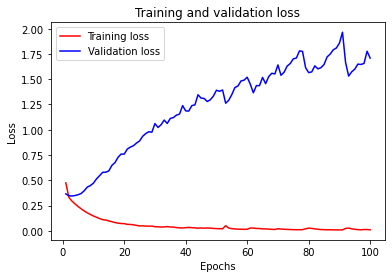

In [18]:
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

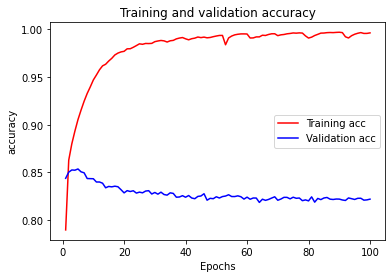

In [19]:
plt.clf() #그림을 초기화

plt.plot(epochs, acc, 'r-', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [2]:
word2vec_file_path = './word2vec.txt'

In [6]:
f = open(word2vec_file_path, w)
f.write('')

NameError: ignored

In [10]:
from gensim.models import Word2Vec
#model = Word2Vec(sentences = corpus, size = 100, window=5, min_count=5, workers=4, sg=0)
# size = 워드 벡터의 특정 값, 임베딩 된 벡터의 차원
# window = context window 의 크기
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram

In [30]:
train_data = pd.read_csv('/content/drive/MyDrive/dataset/news_data.csv')
train_data.head()

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


In [32]:
train_data['news'] = train_data['news'].str.replace("[^가-힣]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [33]:
train_data = train_data.dropna(how='any')
train_data.drop_duplicates(subset=['news'], inplace=True)


In [34]:
train_data.head()

,news,code
0,파주시청 사진제공 파주시 파주시청 사진제공 파주시 파주 파이낸셜뉴스 강근주 ...,사회
1,동영상 뉴스 이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다 서울 강남경찰서는 ...,사회
4,서울 연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 ...,사회


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [69]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [70]:
# 불용어 제거 및 토큰화 적용
okt = Okt()
tokenized_data = []
for sentence in train_data['news']:
    temp_x = okt.morphs (sentence, stem=True)
    temp_x = [word for word in temp_x if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_x)

In [72]:
model = Word2Vec(sentences = tokenized_data, size=100, window=5, min_count=5, workers=4, sg=0)


In [73]:
model.wv.most_similar("남성")


[('노모', 0.8751863241195679),
 ('깨물다', 0.8329070806503296),
 ('여성', 0.8229956030845642),
 ('숨다', 0.82058185338974),
 ('폭행', 0.8160547018051147),
 ('흉기', 0.7964166402816772),
 ('혀', 0.7916548252105713),
 ('헛디디다', 0.7861912250518799),
 ('앓다', 0.7734180688858032),
 ('고령', 0.7710012197494507)]

[('윤', 0.34894704818725586), ('김', 0.3364357352256775), ('일', 0.3353652358055115), ('월', 0.3229697048664093), ('년', 0.3137238919734955), ('단', 0.31273502111434937), ('홍', 0.30945175886154175), ('뉴', 0.2823263108730316), ('전', 0.2691117525100708), ('기', 0.2680448889732361)]
